In [11]:
# IMDB 리뷰 데이터 셋
from tensorflow.keras.datasets import imdb

(train_input, train_target),(test_input, test_target) = imdb.load_data(num_words=500, skip_top=20)
# skip_top - 1~20위까지는 생략

In [12]:
print(train_input.shape, test_input.shape) # 데이터의 의미를 정확하게 파악

(25000,) (25000,)


In [13]:
print(len(train_input[0]), len(train_input[1])) # 첫번째 댓글은 218, 두번째 189

218 189


In [14]:
print(train_input[0]) # 단어 빈도수 순위(top 20을 배제한)

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [15]:
print(train_target[:20]) # 1번은 긍정, 0번은 부정. 그래서 softmax는 필요없게 된다.

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [16]:
# 훈련 세트에서 2(어휘 사전에 없는 단어) 제외하기
for i in range(len(train_input)):
    train_input[i] = [w for w in train_input[i] if w > 2] # 단어 218번만큼 반복

print(train_input[0])

[14, 22, 16, 43, 65, 458, 66, 4, 173, 36, 256, 5, 25, 100, 43, 112, 50, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 336, 385, 39, 4, 172, 17, 38, 13, 447, 4, 192, 50, 16, 6, 147, 19, 14, 22, 4, 469, 4, 22, 71, 87, 12, 16, 43, 38, 76, 15, 13, 4, 22, 17, 17, 12, 16, 18, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 16, 480, 66, 33, 4, 130, 12, 16, 38, 5, 25, 124, 51, 36, 135, 48, 25, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 8, 4, 107, 117, 15, 256, 4, 7, 5, 36, 71, 43, 476, 26, 400, 317, 46, 7, 4, 13, 104, 88, 4, 381, 15, 297, 98, 32, 56, 26, 141, 6, 194, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 88, 12, 16, 283, 5, 16, 113, 103, 32, 15, 16, 19, 178, 32]


In [17]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = \
train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [18]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [19]:
print(np.mean(lengths), np.median(lengths))

164.67985 126.0


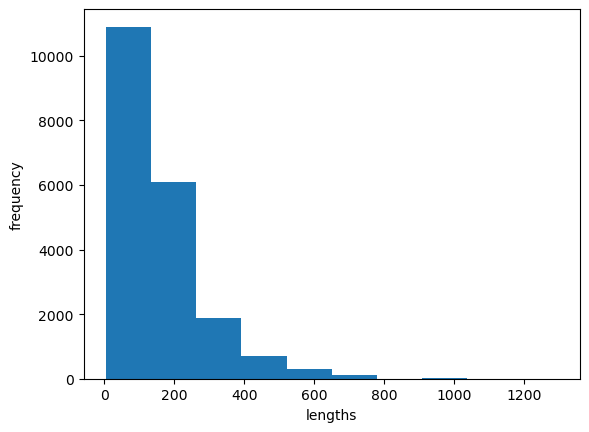

In [20]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_sequences(train_input, maxlen=100) # 100글자 이후만 남기고 나머지 글자는 싹 다 지워버림.

array([[493, 185, 250, ...,  20, 470, 158],
       [131, 193, 292, ..., 168, 206, 312],
       [332,  86,  32, ...,  57,  23,  65],
       ...,
       [309, 287,  39, ..., 222, 195,  46],
       [  0,   0,   0, ..., 214,  25, 170],
       [  0,   0,   0, ...,  80,  25, 194]])